In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df1 = pd.read_csv('Cleavland.csv',header=None, names=col_names,na_values='?')
df2 = pd.read_csv('hung.csv', header=None,names=col_names,na_values='?')
df3 = pd.read_csv('Switzerland.csv', header=None,names=col_names,na_values='?')

print(df1.shape)
print(df2.shape)
print(df3.shape)

(303, 14)
(294, 14)
(123, 14)


In [5]:
df = pd.concat([df1,df2,df3])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


# Pre Processing

In [6]:
df.shape

(720, 14)

In [7]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
target        0
dtype: int64

In [8]:
# fill null values with mean and mode
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalach'].fillna(df['thalach'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

In [9]:
cols = df.select_dtypes(include=['number'])

for col in cols:
    neg = (df[col] < 0).sum()
    print(f"Negative values in column '{col}': {neg}")

Negative values in column 'age': 0
Negative values in column 'sex': 0
Negative values in column 'cp': 0
Negative values in column 'trestbps': 0
Negative values in column 'chol': 0
Negative values in column 'fbs': 0
Negative values in column 'restecg': 0
Negative values in column 'thalach': 0
Negative values in column 'exang': 0
Negative values in column 'oldpeak': 11
Negative values in column 'slope': 0
Negative values in column 'ca': 0
Negative values in column 'thal': 0
Negative values in column 'target': 0


In [10]:
df[df['oldpeak'] < 0] = df['oldpeak'].mean()

cols = df.select_dtypes(include=['number'])

for col in cols:
    neg = (df[col] < 0).sum()
    print(f"Negative values in column '{col}': {neg}")

Negative values in column 'age': 0
Negative values in column 'sex': 0
Negative values in column 'cp': 0
Negative values in column 'trestbps': 0
Negative values in column 'chol': 0
Negative values in column 'fbs': 0
Negative values in column 'restecg': 0
Negative values in column 'thalach': 0
Negative values in column 'exang': 0
Negative values in column 'oldpeak': 0
Negative values in column 'slope': 0
Negative values in column 'ca': 0
Negative values in column 'thal': 0
Negative values in column 'target': 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  720 non-null    float64
 4   chol      720 non-null    float64
 5   fbs       720 non-null    float64
 6   restecg   720 non-null    float64
 7   thalach   720 non-null    float64
 8   exang     720 non-null    float64
 9   oldpeak   720 non-null    float64
 10  slope     720 non-null    float64
 11  ca        720 non-null    float64
 12  thal      720 non-null    float64
 13  target    720 non-null    float64
dtypes: float64(14)
memory usage: 84.4 KB


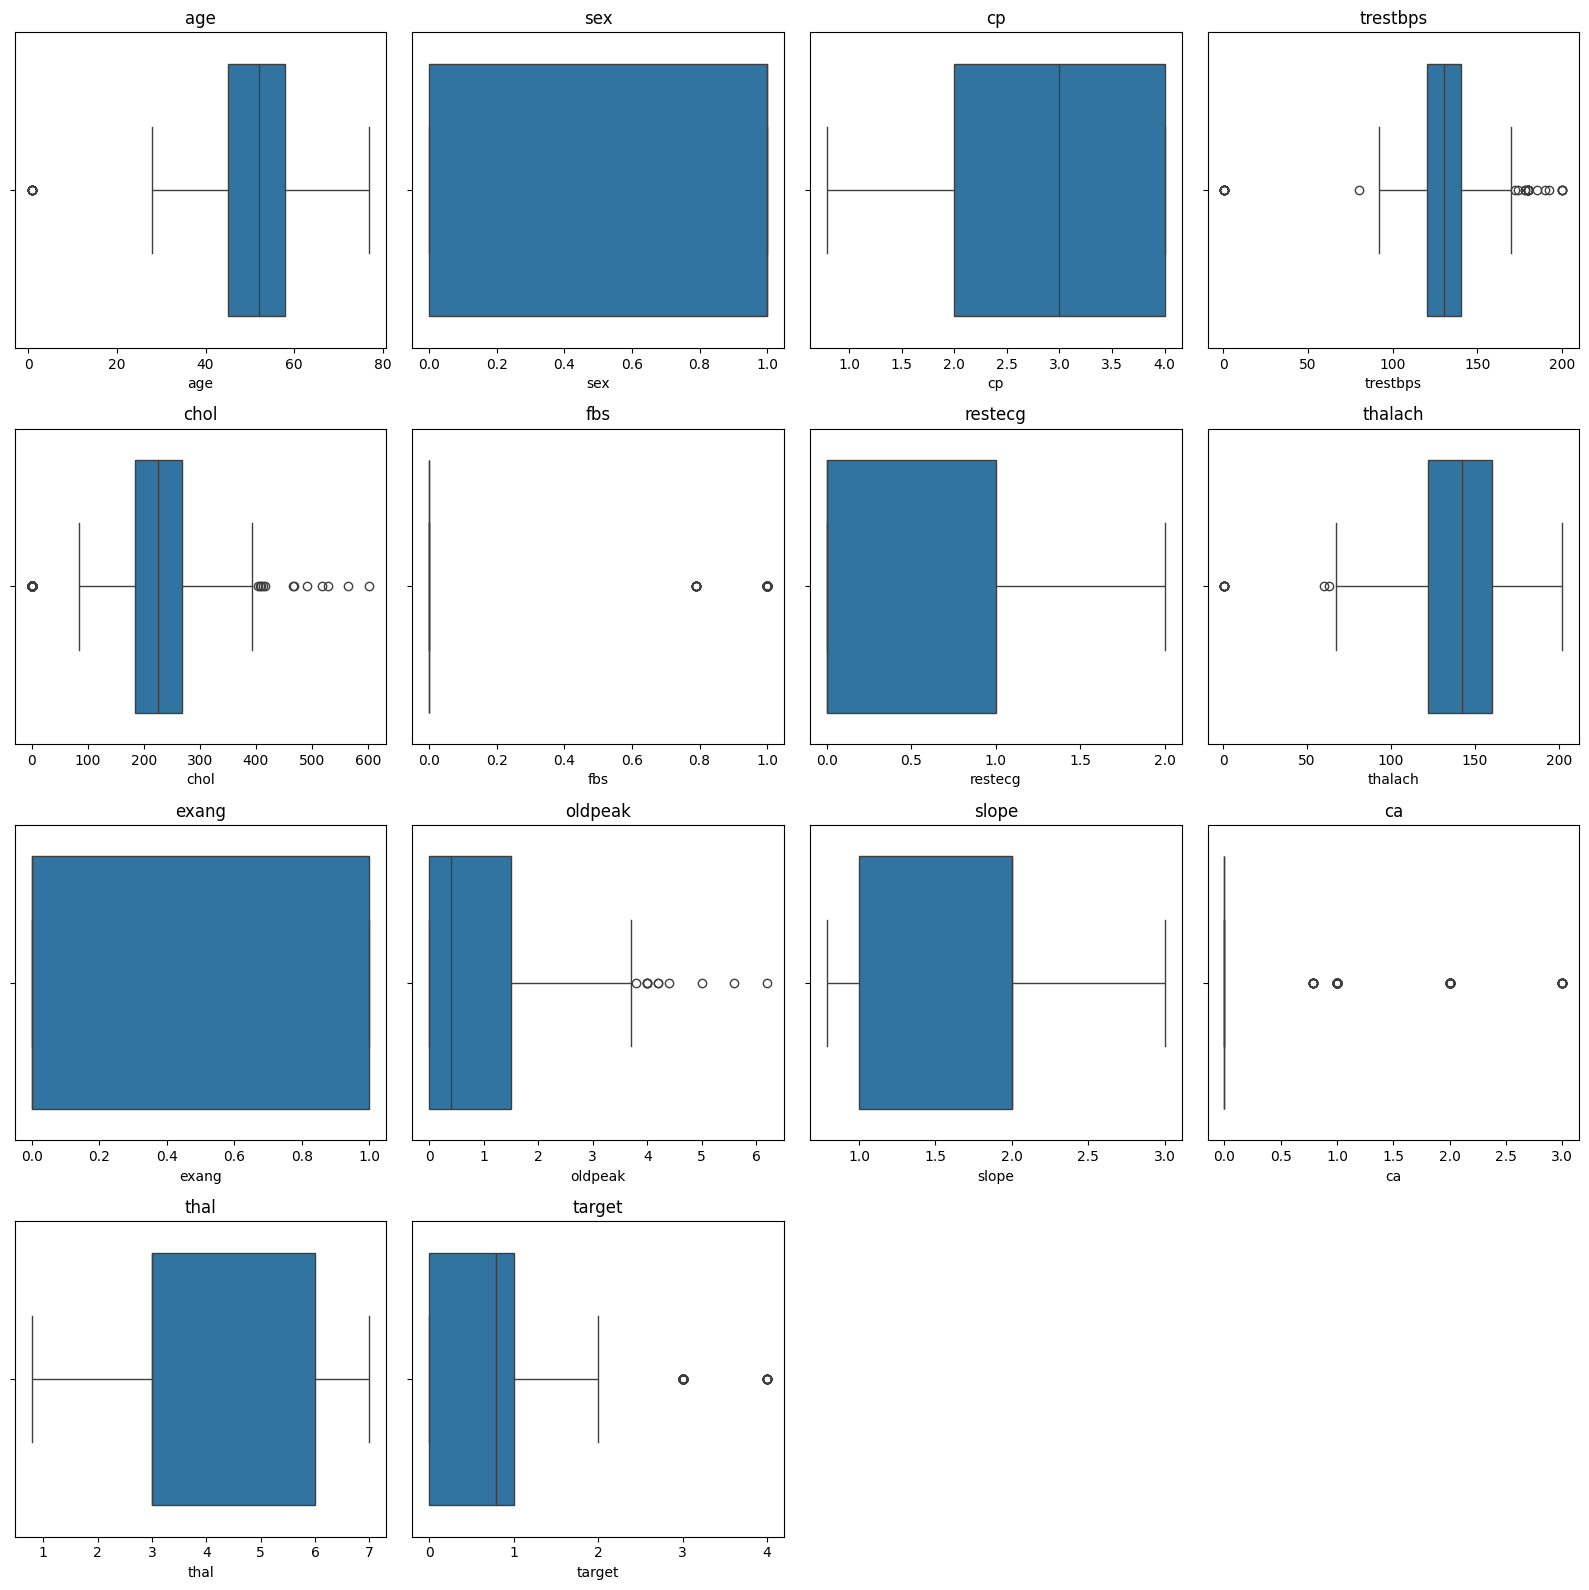

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def visBoxplot(df):    
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16, rows*4))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()
    
visBoxplot(df)

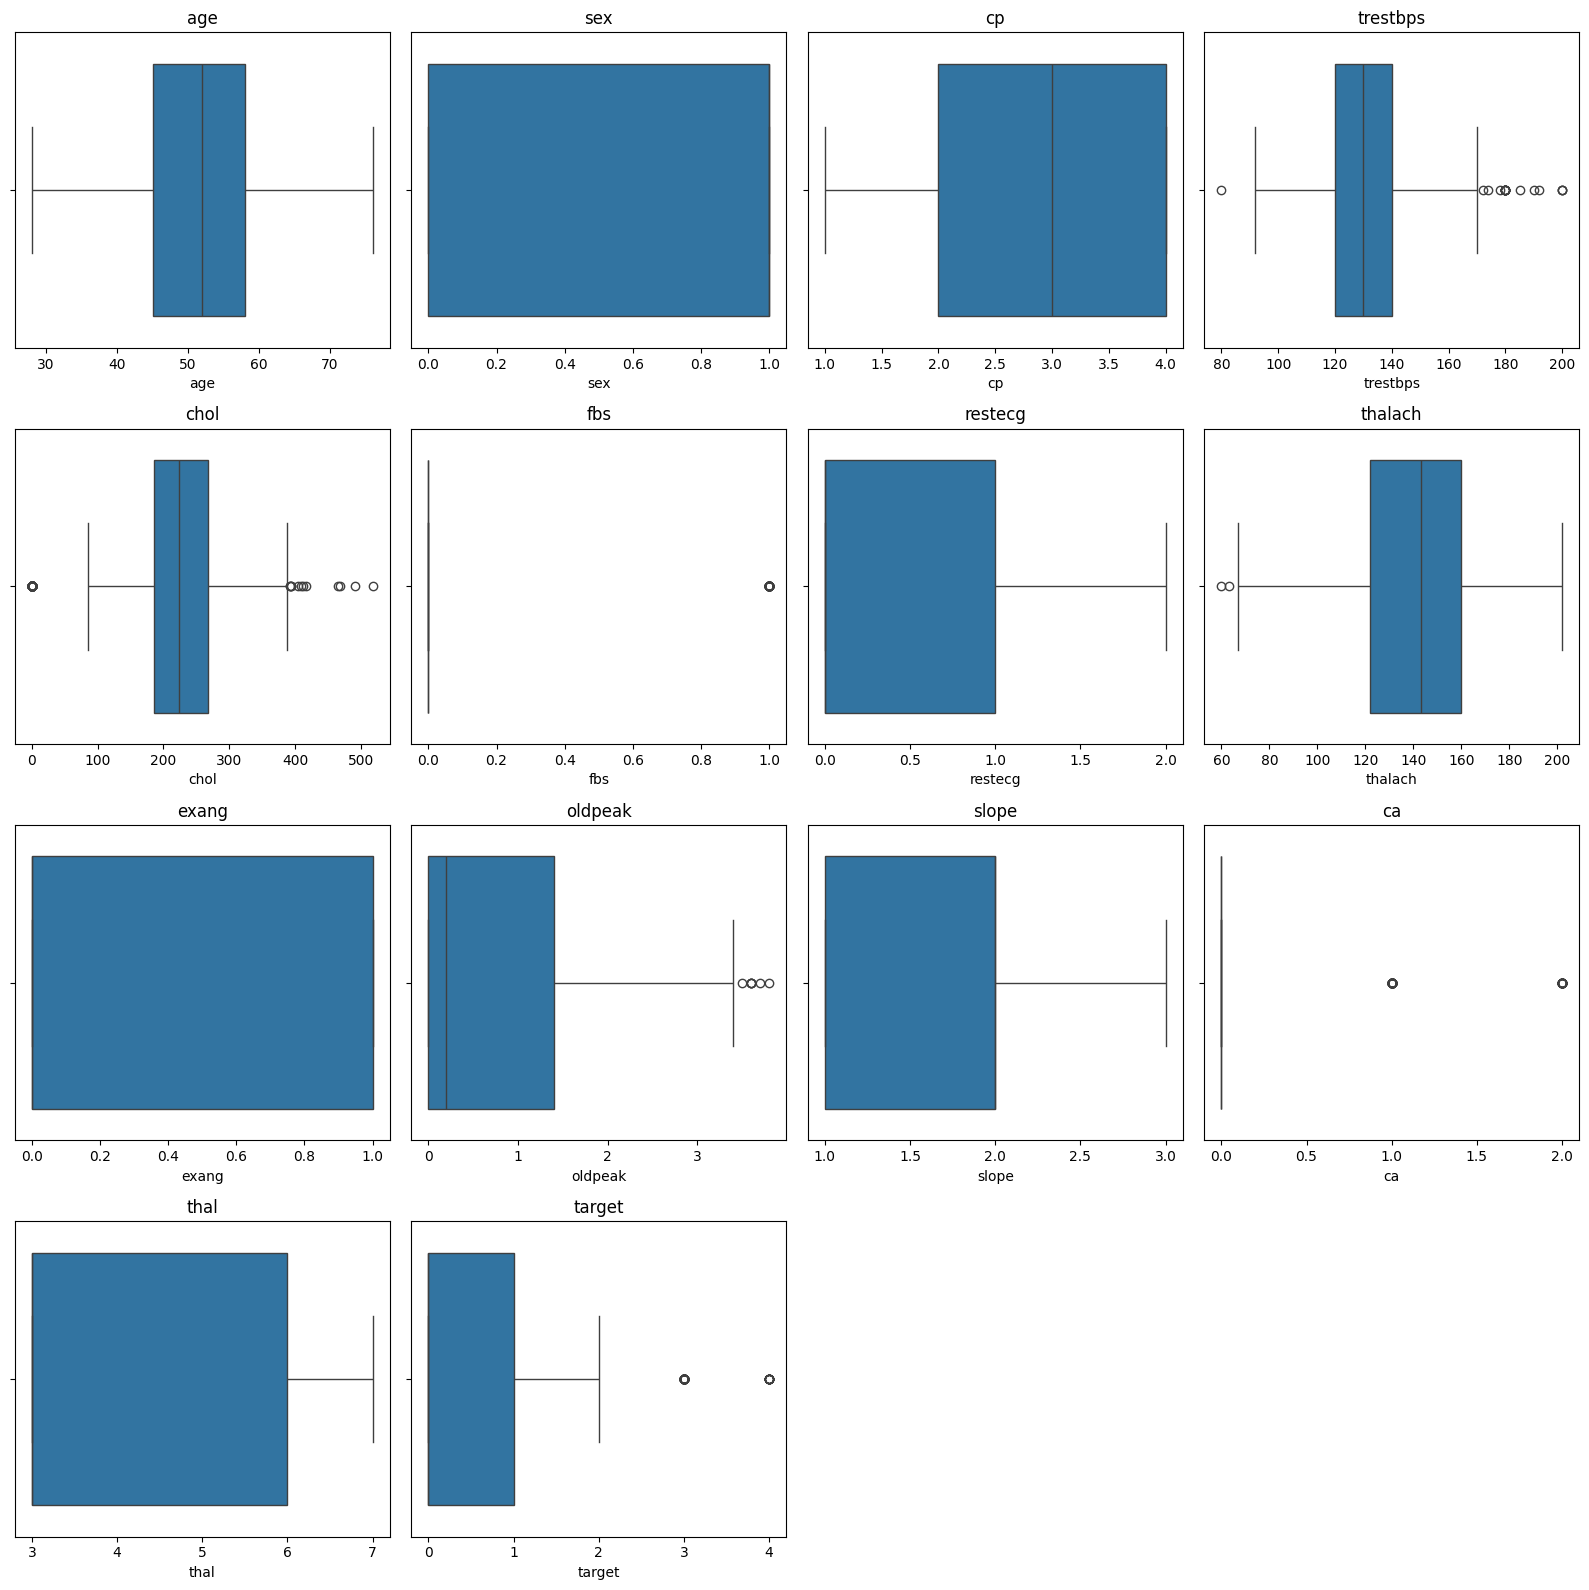

In [13]:
# remove outliers

def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / (numeric_cols.std()))
    out = zscore > 3
    df = df[~out.any(axis = 1)]
    return df

def rem2(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    outliers = (df < lower_threshold) | (df > upper_threshold)
    
    df = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]
    return df
    
ndf = rem1(df)
df = ndf 
visBoxplot(df)

# Visualization

## Histogram

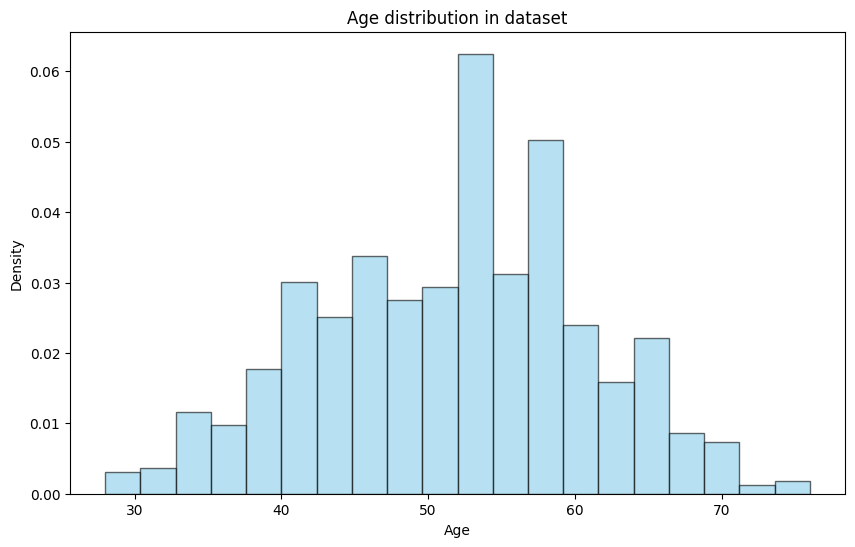

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Age distribution in dataset")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


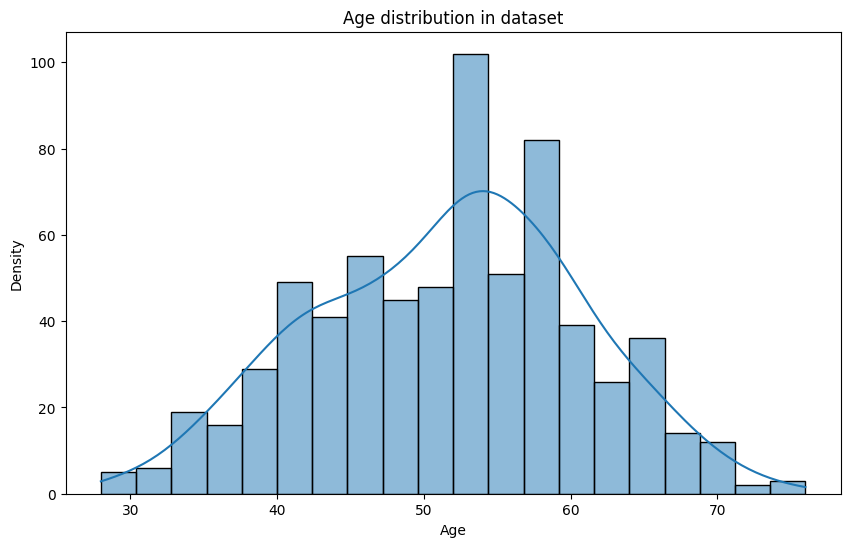

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=20,kde=True)
plt.title("Age distribution in dataset")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

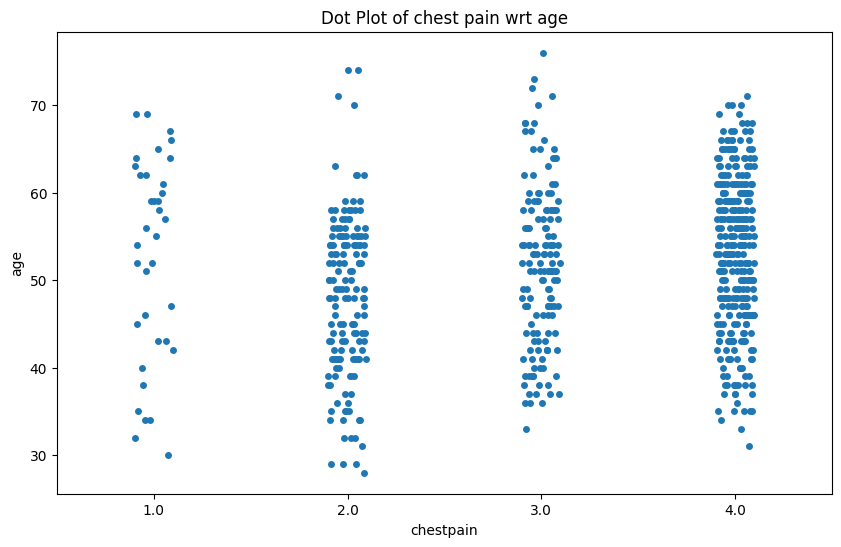

In [16]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df['cp'],y=df['age'],jitter=True)
plt.title("Dot Plot of chest pain wrt age")
plt.xlabel('chestpain')
plt.ylabel('age')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6696\1676716812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['sex'],y=df['chol'],palette='viridis')


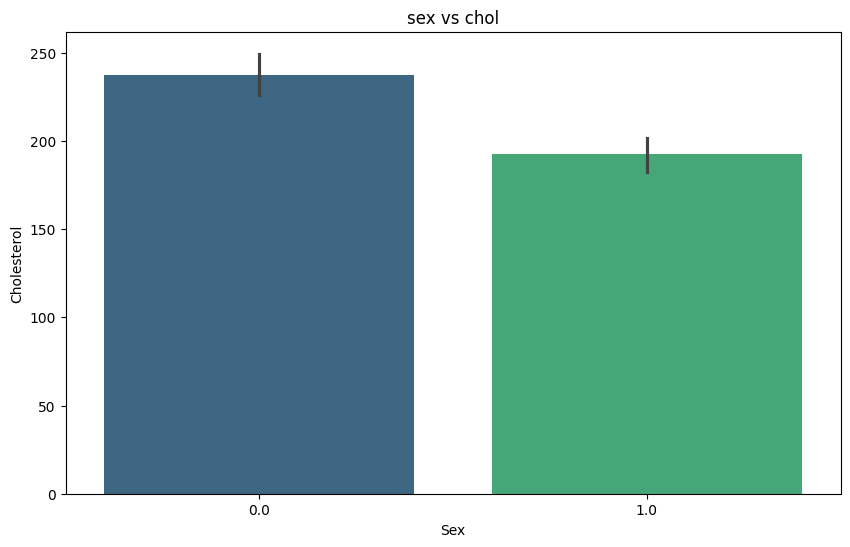

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['sex'],y=df['chol'],palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.title('sex vs chol')
plt.show()

Text(0.5, 1.0, 'Age vs Resting Blood Pressure')

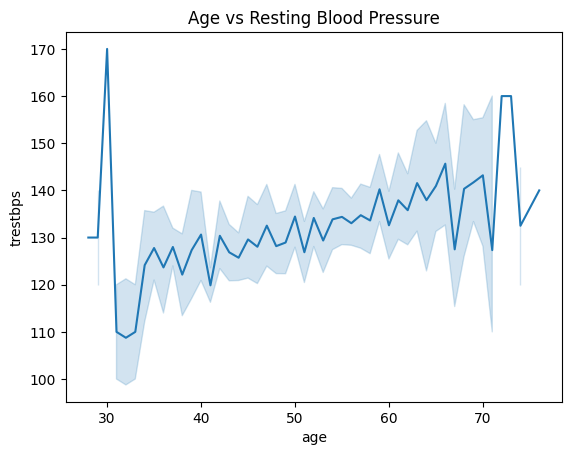

In [18]:
sns.lineplot(x=df['age'],y=df['trestbps'])
plt.title('Age vs Resting Blood Pressure')

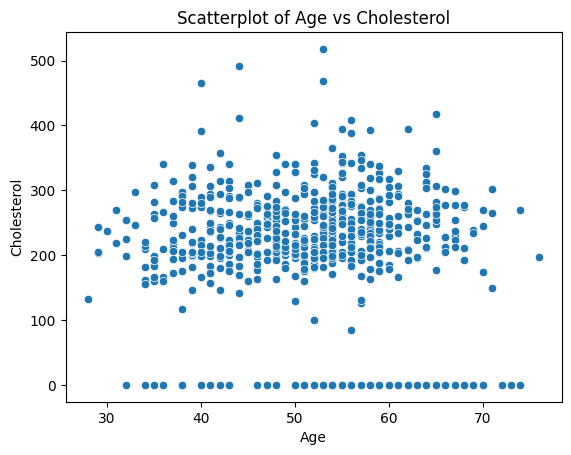

In [19]:
sns.scatterplot(data=df, x='age', y='chol')
plt.title('Scatterplot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

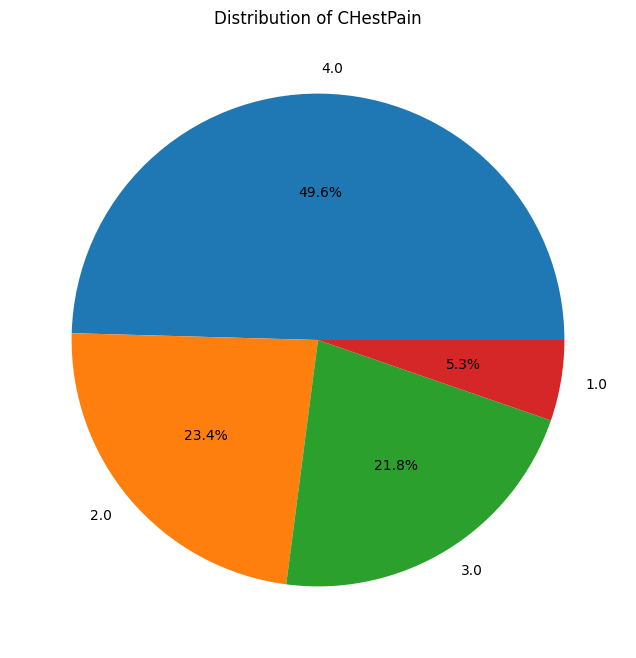

In [20]:
plt.figure(figsize=(8, 8))
df['cp'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of CHestPain')
plt.ylabel('')
plt.show()

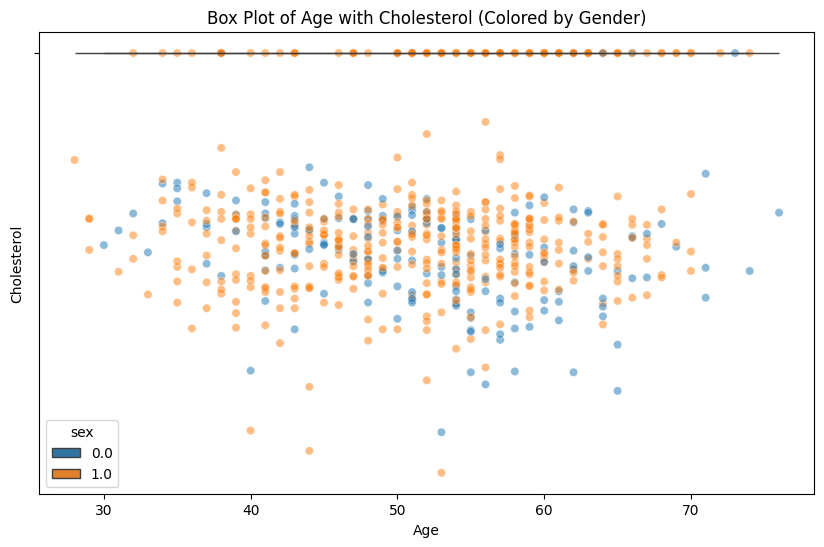

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age',hue='sex')
plt.title('Box Plot of Age with Cholesterol (Colored by Gender)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Scatter plot of 'chol' on top of box plot
sns.scatterplot(data=df, x='age', y='chol', hue='sex', legend=False, marker='o', alpha=0.5)

plt.show()